<a href="https://colab.research.google.com/github/juliaradula/rhizomucor_miehei_transcriptome/blob/main/transcriptome_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
anotados = pd.read_csv("/content/drive/MyDrive/anotadosRMA.csv")
anotados.shape

(45545, 33)

In [ ]:
anotados.head()

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons),1,soma_tpm,3
0,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.0000,2.392140,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN5046,2.392140,38.3
1,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i1.p1,127-1542[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-374,H:52-407^34.8...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1766,1616.790,33.9009,1.118050,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,34.9
2,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i2,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1590,H:52-497^31...",.,TRINITY_DN20898_c0_g3_i2.p1,127-1599[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-488,H:52-497^31.4...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1822,1672.790,144.2730,4.598860,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,31.0
3,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i5,"PAPOB_HUMAN^PAPOB_HUMAN^Q:181-1671,H:52-497^29...",.,TRINITY_DN20898_c0_g3_i5.p1,127-1680[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-515,H:52-497^29.7...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1903,1753.790,26.3818,0.802108,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,29.7
4,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i7,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i7.p1,127-1494[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:17-374,H:50-407^34.6...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1517,1367.790,21.0105,0.819071,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,34.9


In [ ]:
numero_enzimas = anotados["EC number"]
numero_enzimas = len(numero_enzimas.dropna())
numero_enzimas

19460

In [ ]:
hidrolases = pd.DataFrame(anotados[anotados["EC number"].str.match("^3.*") == True])
hidrolases

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons),1,soma_tpm,3
13,TRINITY_DN5061_c0_g1,TRINITY_DN5061_c0_g1_i1,"ACO13_MOUSE^ACO13_MOUSE^Q:127-483,H:22-137^30%...",.,TRINITY_DN5061_c0_g1_i1.p1,1-513[+],"ACO13_MOUSE^ACO13_MOUSE^Q:43-161,H:22-137^30%I...",.,.,.,COG2050^thioesterase Superfamily protein,KEGG:mmu:66834`KO:K17362,GO:0005829^cellular_component^cytosol`GO:00057...,.,.,.,672,522.785,97.0000,9.89356,ACO13_MOUSE,Q9CQR4,ACO13_MOUSE,Mus musculus (Mouse),3.1.2.-; 3.1.2.2,cytosol [GO:0005829]; mitochondrion [GO:000573...,GO:0005634; GO:0005739; GO:0005819; GO:0005829...,NaN,R-MMU-77289;,NaN,DN5061,9.893560,3.0
166,TRINITY_DN14801_c1_g2,TRINITY_DN14801_c1_g2_i1,"MCE1_MOUSE^MCE1_MOUSE^Q:794-1144,H:60-177^35.5...",.,TRINITY_DN14801_c1_g2_i1.p1,2-1162[+],"MCE1_MOUSE^MCE1_MOUSE^Q:265-381,H:60-177^35.59...",.,.,ExpAA=18.23^PredHel=1^Topology=i75-97o,COG5226^Second step of mRNA capping. Transfer ...,KEGG:mmu:24018`KO:K13917,GO:0005634^cellular_component^nucleus`GO:00055...,.,.,.,1255,1105.790,46.3627,2.23564,MCE1_MOUSE,O55236,MCE1_MOUSE,Mus musculus (Mouse),3.1.3.33; 2.7.7.50,nucleus [GO:0005634]; GTP binding [GO:0005525]...,GO:0004484; GO:0004651; GO:0004725; GO:0005525...,NaN,R-MMU-72086;R-MMU-77075;,NaN,DN14801,1127.004947,35.5
167,TRINITY_DN14801_c1_g2,TRINITY_DN14801_c1_g2_i2,"MCE1_HUMAN^MCE1_HUMAN^Q:840-1190,H:60-177^35.5...",.,TRINITY_DN14801_c1_g2_i2.p2,777-1208[+],"MCE1_HUMAN^MCE1_HUMAN^Q:22-138,H:60-177^35.59%...",.,.,.,COG5226^Second step of mRNA capping. Transfer ...,KEGG:hsa:8732`KO:K13917,GO:0005654^cellular_component^nucleoplasm`GO:0...,.,.,.,1301,1151.790,29.9192,1.38511,MCE1_HUMAN,O60942,MCE1_HUMAN,Homo sapiens (Human),3.1.3.33; 2.7.7.50,nucleoplasm [GO:0005654]; nucleus [GO:0005634]...,GO:0004484; GO:0004651; GO:0004725; GO:0005525...,NaN,R-HSA-167160;R-HSA-72086;R-HSA-77075;,O60942;,DN14801,1127.004947,35.5
168,TRINITY_DN14801_c1_g2,TRINITY_DN14801_c1_g2_i4,"MCE1_HUMAN^MCE1_HUMAN^Q:774-1124,H:60-177^35.5...",.,TRINITY_DN14801_c1_g2_i4.p2,711-1142[+],"MCE1_HUMAN^MCE1_HUMAN^Q:22-138,H:60-177^35.59%...",.,.,.,COG5226^Second step of mRNA capping. Transfer ...,KEGG:hsa:8732`KO:K13917,GO:0005654^cellular_component^nucleoplasm`GO:0...,.,.,.,1235,1085.790,54.9797,2.69999,MCE1_HUMAN,O60942,MCE1_HUMAN,Homo sapiens (Human),3.1.3.33; 2.7.7.50,nucleoplasm [GO:0005654]; nucleus [GO:0005634]...,GO:0004484; GO:0004651; GO:0004725; GO:0005525...,NaN,R-HSA-167160;R-HSA-72086;R-HSA-77075;,O60942;,DN14801,1127.004947,35.5
169,TRINITY_DN14801_c1_g2,TRINITY_DN14801_c1_g2_i5,"MCE1_HUMAN^MCE1_HUMAN^Q:737-1078,H:63-177^36.5...",.,TRINITY_DN14801_c1_g2_i5.p1,2-1096[+],"MCE1_MOUSE^MCE1_MOUSE^Q:243-359,H:60-177^35.59...",.,.,.,COG5226^Second step of mRNA capping. Transfer ...,KEGG:mmu:24018`KO:K13917,GO:0005634^cellular_component^nucleus`GO:00055...,.,.,.,1189,1039.790,88.2943,4.52786,MCE1_HUMAN,O60942,MCE1_HUMAN,Homo sapiens (Human),3.1.3.33; 2.7.7.50,nucleoplasm [GO:0005654]; nucleus [GO:0005634]...,GO:0004484; GO:0004651; GO:0004725; GO:0005525...,NaN,R-HSA-167160;R-HSA-72086;R-HSA-77075;,O60942;,DN14801,1127.004947,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45518,TRINITY_DN21038_c0_g1,TRINITY_DN21038_c0_g1_i1,"MUG81_SCHPO^MUG81_SCHPO^Q:380-5653,H:189-1923^...",.,TRINITY_DN21038_c0_g1_i1.p1,608-5713[+],"MUG81_SCHPO^MUG81_SCHPO^Q:1-1682,H:264-1923^57...",.,.,.,.,KEGG:spo:SPBC13G1.10c`KO:K18664,GO:0099053^cellular_component^activating signa...,.,.,.,5757,5607.790,892.0000,8.48159,MUG81_SCHPO,O60072,MUG81_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,3.6.4.-,activating signal cointegrator 1 complex [GO:0...,GO:0

In [ ]:
hidrolases.shape

(6177, 33)

In [ ]:
peptidases = pd.DataFrame(anotados[anotados["EC number"].str.match("3.4.*") == True])

In [ ]:
peptidases.shape

(1355, 33)

In [ ]:
anotados.dtypes

#gene_id                             object
transcript_id                        object
sprot_Top_BLASTX_hit                 object
RNAMMER                              object
prot_id                              object
prot_coords                          object
sprot_Top_BLASTP_hit                 object
Pfam                                 object
SignalP                              object
TmHMM                                object
eggnog                               object
Kegg                                 object
gene_ontology_blast                  object
gene_ontology_pfam                   object
transcript                           object
peptide                              object
length                                int64
eff_length                          float64
est_counts                          float64
tpm                                 float64
0                                    object
Entry                                object
Entry name                      

In [ ]:
enzimas2 = anotados.drop_duplicates(subset=["1"])
enzimas2

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons),1,soma_tpm,3
0,TRINITY_DN5046_c0_g1,TRINITY_DN5046_c0_g1_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:263-15,H:61-146^38.3...",.,.,.,.,.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,595,445.808,20.00000,2.392140,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN5046,2.392140,38.3
1,TRINITY_DN20898_c0_g3,TRINITY_DN20898_c0_g3_i1,"PAPOB_HUMAN^PAPOB_HUMAN^Q:184-1248,H:53-407^34...",.,TRINITY_DN20898_c0_g3_i1.p1,127-1542[+],"PAPOB_HUMAN^PAPOB_HUMAN^Q:19-374,H:52-407^34.8...",.,.,.,COG5186^polyA polymerase,KEGG:hsa:56903`KO:K14376,GO:0005737^cellular_component^cytoplasm`GO:000...,.,.,.,1766,1616.790,33.90090,1.118050,PAPOB_HUMAN,Q9NRJ5,PAPOB_HUMAN,Homo sapiens (Human),2.7.7.19,nucleus [GO:0005634]; ATP binding [GO:0005524]...,GO:0003723; GO:0004652; GO:0005524; GO:0005634...,NaN,NaN,Q9NRJ5;,DN20898,92.642085,34.9
11,TRINITY_DN5043_c0_g1,TRINITY_DN5043_c0_g1_i1,"YDQC_SCHPO^YDQC_SCHPO^Q:137-340,H:216-283^44.1...",.,TRINITY_DN5043_c0_g1_i1.p1,2-472[+],"YDQC_SCHPO^YDQC_SCHPO^Q:46-119,H:216-292^46.75...",.,.,.,.,KEGG:spo:SPAC5D6.12,GO:0005739^cellular_component^mitochondrion`GO...,.,.,.,556,406.827,76.00000,9.961120,YDQC_SCHPO,O14204,YDQC_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,NaN,mitochondrial matrix [GO:0005759]; mitochondri...,GO:0000376; GO:0005739; GO:0005759; GO:0008494...,NaN,NaN,NaN,DN5043,9.961120,44.1
12,TRINITY_DN3416_c0_g1,TRINITY_DN3416_c0_g1_i1,"YDQC_SCHPO^YDQC_SCHPO^Q:575-937,H:169-290^30.6...",.,TRINITY_DN3416_c0_g1_i1.p1,2-1060[+],"YDQC_SCHPO^YDQC_SCHPO^Q:192-312,H:169-290^30.6...",.,.,.,.,KEGG:spo:SPAC5D6.12,GO:0005739^cellular_component^mitochondrion`GO...,.,.,.,1148,998.785,82.00000,4.377700,YDQC_SCHPO,O14204,YDQC_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,NaN,mitochondrial matrix [GO:0005759]; mitochondri...,GO:0000376; GO:0005739; GO:0005759; GO:0008494...,NaN,NaN,NaN,DN3416,4.377700,30.6
13,TRINITY_DN5061_c0_g1,TRINITY_DN5061_c0_g1_i1,"ACO13_MOUSE^ACO13_MOUSE^Q:127-483,H:22-137^30%...",.,TRINITY_DN5061_c0_g1_i1.p1,1-513[+],"ACO13_MOUSE^ACO13_MOUSE^Q:43-161,H:22-137^30%I...",.,.,.,COG2050^thioesterase Superfamily protein,KEGG:mmu:66834`KO:K17362,GO:0005829^cellular_component^cytosol`GO:00057...,.,.,.,672,522.785,97.00000,9.893560,ACO13_MOUSE,Q9CQR4,ACO13_MOUSE,Mus musculus (Mouse),3.1.2.-; 3.1.2.2,cytosol [GO:0005829]; mitochondrion [GO:000573...,GO:0005634; GO:0005739; GO:0005819; GO:0005829...,NaN,R-MMU-77289;,NaN,DN5061,9.893560,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,TRINITY_DN21083_c0_g1,TRINITY_DN21083_c0_g1_i4,"PALF_ASHGO^PALF_ASHGO^Q:37-705,H:28-286^22.3%I...",.,TRINITY_DN21083_c0_g1_i4.p1,1-774[+],"PALF_ASHGO^PALF_ASHGO^Q:13-235,H:28-286^22.3%I...",.,.,.,.,KEGG:ago:AGOS_AFR108W`KO:K20063,GO:0009898^cellular_component^cytoplasmic side...,.,.,.,784,634.785,8.60936,0.723182,PALF_ASHGO,Q754G2,PALF_ASHGO,Ashbya gossypii (strain ATCC 10895 / CBS 109.5...,NaN,cytoplasm [GO:0005737]; cytoplasmic side of pl...,GO:0001403; GO:0005737; GO:0005829; GO:0005886...,NaN,NaN,NaN,DN21083,26.679252,22.0
45524,TRINITY_DN21044_c0_g1,TRINITY_DN21044_c0_g1_i1,"WDR7_HUMAN^WDR7_HUMAN^Q:431-1951,H:90-615^23.9...",.,TRINITY_DN21044_c0_g1_i1.p1,680-3841[+],"WDR7_HUMAN^WDR7_HUMAN^Q:82-456,H:253-646^26.35...",.,.,.,ENOG410Y2AE^WD repeat domain 7,KEGG:hsa:23335,GO:0008021^cellular_component^synaptic vesicle...,.,.,.,3996,3846.790,258.37800,3.581470,WDR7_H

In [ ]:
sum(enzimas2["soma_tpm"])

757313.0567572998

In [ ]:
hidrolases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("3.*") == True])
hidrolases2

,#gene_id,transcript_id,sprot_Top_BLASTX_hit,RNAMMER,prot_id,prot_coords,sprot_Top_BLASTP_hit,Pfam,SignalP,TmHMM,eggnog,Kegg,gene_ontology_blast,gene_ontology_pfam,transcript,peptide,length,eff_length,est_counts,tpm,0,Entry,Entry name,Organism,EC number,Gene ontology (GO),Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (Reactome),Cross-reference (PathwayCommons),1,soma_tpm,3
13,TRINITY_DN5061_c0_g1,TRINITY_DN5061_c0_g1_i1,"ACO13_MOUSE^ACO13_MOUSE^Q:127-483,H:22-137^30%...",.,TRINITY_DN5061_c0_g1_i1.p1,1-513[+],"ACO13_MOUSE^ACO13_MOUSE^Q:43-161,H:22-137^30%I...",.,.,.,COG2050^thioesterase Superfamily protein,KEGG:mmu:66834`KO:K17362,GO:0005829^cellular_component^cytosol`GO:00057...,.,.,.,672,522.785,97.0000,9.89356,ACO13_MOUSE,Q9CQR4,ACO13_MOUSE,Mus musculus (Mouse),3.1.2.-; 3.1.2.2,cytosol [GO:0005829]; mitochondrion [GO:000573...,GO:0005634; GO:0005739; GO:0005819; GO:0005829...,NaN,R-MMU-77289;,NaN,DN5061,9.89356,3.0
170,TRINITY_DN5045_c0_g1,TRINITY_DN5045_c0_g1_i1,"CDA_AMYRO^CDA_AMYRO^Q:1-564,H:175-359^65.43%ID...",.,TRINITY_DN5045_c0_g1_i1.p1,1-744[+],"CDA_AMYRO^CDA_AMYRO^Q:1-188,H:175-359^67.02%ID...",.,.,ExpAA=19.04^PredHel=1^Topology=i224-246o,.,.,GO:0004099^molecular_function^chitin deacetyla...,.,.,.,841,691.785,7552.4800,582.13300,CDA_AMYRO,P50325,CDA_AMYRO,Amylomyces rouxii (Filamentous fungus) (Mucor ...,3.5.1.41,anchored component of membrane [GO:0031225]; c...,GO:0000272; GO:0004099; GO:0005576; GO:0005618...,NaN,NaN,NaN,DN5045,582.13300,65.4
171,TRINITY_DN1513_c0_g1,TRINITY_DN1513_c0_g1_i1,"CDA_AMYRO^CDA_AMYRO^Q:5-472,H:211-358^42.24%ID...",.,TRINITY_DN1513_c0_g1_i1.p1,2-478[+],"CDA_AMYRO^CDA_AMYRO^Q:2-157,H:211-358^42.24%ID...",.,.,.,.,.,GO:0004099^molecular_function^chitin deacetyla...,.,.,.,505,355.863,14.0000,2.09772,CDA_AMYRO,P50325,CDA_AMYRO,Amylomyces rouxii (Filamentous fungus) (Mucor ...,3.5.1.41,anchored component of membrane [GO:0031225]; c...,GO:0000272; GO:0004099; GO:0005576; GO:0005618...,NaN,NaN,NaN,DN1513,2.09772,42.2
172,TRINITY_DN1589_c0_g1,TRINITY_DN1589_c0_g1_i1,"CDA_AMYRO^CDA_AMYRO^Q:218-868,H:67-281^47.51%I...",.,TRINITY_DN1589_c0_g1_i1.p1,2-868[+],"CDA_AMYRO^CDA_AMYRO^Q:73-289,H:67-281^47.51%ID...",.,sigP:1^27^0.69^YES,.,.,.,GO:0004099^molecular_function^chitin deacetyla...,.,.,.,868,718.785,45.0000,3.33824,CDA_AMYRO,P50325,CDA_AMYRO,Amylomyces rouxii (Filamentous fungus) (Mucor ...,3.5.1.41,anchored component of membrane [GO:0031225]; c...,GO:0000272; GO:0004099; GO:0005576; GO:0005618...,NaN,NaN,NaN,DN1589,3.33824,47.5
173,TRINITY_DN21788_c0_g1,TRINITY_DN21788_c0_g1_i1,"CDA_AMYRO^CDA_AMYRO^Q:6-698,H:145-358^42.49%ID...",.,TRINITY_DN21788_c0_g1_i1.p1,3-812[+],"CDA_AMYRO^CDA_AMYRO^Q:2-232,H:145-358^42.49%ID...",.,.,.,.,.,GO:0004099^molecular_function^chitin deacetyla...,.,.,.,833,683.785,23.0000,1.79354,CDA_AMYRO,P50325,CDA_AMYRO,Amylomyces rouxii (Filamentous fungus) (Mucor ...,3.5.1.41,anchored component of membrane [GO:0031225]; c...,GO:0000272; GO:0004099; GO:0005576; GO:0005618...,NaN,NaN,NaN,DN21788,1.79354,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45431,TRINITY_DN9353_c0_g1,TRINITY_DN9353_c0_g1_i1,"NAPEP_PONAB^NAPEP_PONAB^Q:353-1255,H:62-382^36...",.,TRINITY_DN9353_c0_g1_i1.p1,137-1273[+],"NAPEP_PONAB^NAPEP_PONAB^Q:73-373,H:62-382^36.2...",.,.,.,COG2220^Hydrolase,KEGG:pon:100172099`KO:K13985,GO:0005769^cellular_component^early endosome`G...,.,.,.,1286,1136.790,58.1923,2.72955,NAPEP_PONAB,Q5RCU3,NAPEP_PONAB,Pongo abelii (Sumatran orangutan) (Pongo pygma...,3.1.4.54,early endosome [GO:0005769]; early endosome me...,GO:0000139; GO:0001659; GO:0005635; GO:0005654...,NaN,NaN,NaN,DN9353,4.17461,36.2
45452,TRINITY_DN9385_c0_g1,TRINITY_DN9385_c0_g1_i1,"IRC20_YEAST^IRC20_YEAST^Q:7-2853,H:477-1494^23...",.,TRINITY_DN9385_c0_g1_i1.p1,220-3015[+],"IRC20_YEAST^IRC20_YEAST^Q:7-878,H:555-1494^23....",.,.,.,.,KEGG:sce:YLR247C`KO:K15710,GO:0005739^cellular_component^mitochondrion`GO...,

In [ ]:
hidrolases2["soma_tpm"].sum()

89805.04252717609

In [ ]:
oxirresutases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^1.*") == True])
transferases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^2.*") == True])
liases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^4.*") == True])
isomerases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^5.*") == True])
ligases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^6.*") == True])
translocases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^7.*") == True])

In [ ]:
print(oxirresutases2.shape, transferases2.shape, hidrolases2.shape, liases2.shape, isomerases2.shape, ligases2.shape, translocases2.shape)

(895, 33) (2059, 33) (1703, 33) (219, 33) (168, 33) (255, 33) (136, 33)


In [ ]:
classe_enzimas_dict = {"Classe":["Translocases", "Ligases", "Isomerases", "Liases",  "Hidrolases",  "Transferases", "Oxirredutases"], "tpm" : [translocases2["soma_tpm"].sum(), ligases2["soma_tpm"].sum(), isomerases2["soma_tpm"].sum(), liases2["soma_tpm"].sum(), hidrolases2["soma_tpm"].sum(), transferases2["soma_tpm"].sum(), oxirresutases2["soma_tpm"].sum()]}
classe_enzimas_df = pd.DataFrame(data=classe_enzimas_dict)
classe_enzimas_df

,Classe,tpm
0,Translocases,17612.159216
1,Ligases,8904.343387
2,Isomerases,7945.263658
3,Liases,14281.508338
4,Hidrolases,89805.042527
5,Transferases,64687.740669
6,Oxirredutases,57326.054492


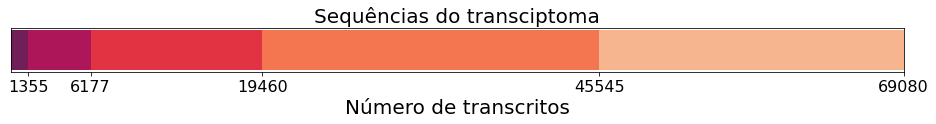

In [ ]:
classe = ["Transcritos"]
fig, ax = plt.subplots(figsize=(16,0.8))
ax.set_xlabel("Número de transcritos", fontdict={"fontsize": 20})
plt.xticks([1355, 6177, 19460, 45545, 69080], fontsize=16)#, rotation=45)
plt.yticks([])
plt.title("Sequências do transciptoma", fontdict={"fontsize":20})

ax.barh(classe, peptidases.shape[0], color="#701F57", label="Peptidases")
ax.barh(classe, hidrolases.shape[0]-peptidases.shape[0], color =  "#AD1659" , left = peptidases.shape[0], label="Hidrolases")
ax.barh(classe, numero_enzimas-hidrolases.shape[0], color = "#E23342", left = hidrolases.shape[0], label="Enzimas")
ax.barh(classe, anotados.shape[0]-numero_enzimas, color = "#F47650", left = numero_enzimas, label="Transcritos anotados")
ax.barh(classe, 69080-anotados.shape[0], color = "#F6B58F", left = anotados.shape[0], label="Total de transcritos")
ax.set_xlim(0,69080)


#plt.legend(fontsize=10, loc=4)
plt.savefig("/content/drive/MyDrive/sequencias_transcriptoma_RMA.png", bbox_inches='tight')

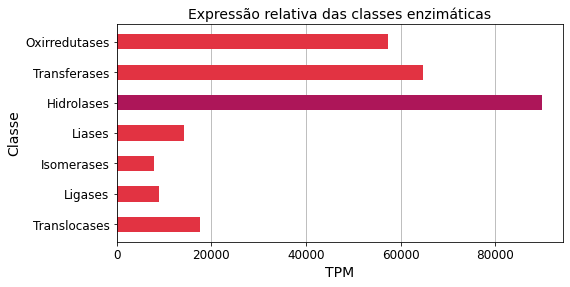

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel("TPM", fontdict={"fontsize":14})
ax.set_ylabel("Classe", fontdict={"fontsize":14})
plt.title("Expressão relativa das classes enzimáticas", fontdict={"fontsize":14})
plt.xticks(fontsize=12)#, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='x')
ax.set_axisbelow(True)


ax.barh(classe_enzimas_df["Classe"], classe_enzimas_df["tpm"], color= ["#E23342", "#E23342", "#E23342", "#E23342", "#AD1659", "#E23342", "#E23342"], height=0.5)

plt.savefig("/content/drive/MyDrive/expressao_enzimas_RMA.png", bbox_inches='tight')

In [ ]:
hydro_unique = hidrolases2["EC number"].unique()
hydro_unique.sort()
hydro_unique

array(['3.-.-.-', '3.1.-.-', '3.1.-.-; 3.1.1.23', '3.1.-.-; 3.1.1.4',
       '3.1.-.-; 3.6.4.12', '3.1.1.-', '3.1.1.-; 3.1.1.23; 3.1.-.-',
       '3.1.1.1', '3.1.1.106; 3.2.2.-', '3.1.1.11', '3.1.1.23',
       '3.1.1.29', '3.1.1.2; 3.1.1.81; 3.1.8.1', '3.1.1.3', '3.1.1.31',
       '3.1.1.4', '3.1.1.45', '3.1.1.4; 3.1.1.5',
       '3.1.1.4; 3.1.1.5; 2.3.1.-', '3.1.1.5',
       '3.1.1.5; 3.1.1.4; 3.1.1.3', '3.1.1.5; 3.5.1.1; 3.1.1.47',
       '3.1.1.6', '3.1.1.65', '3.1.1.79; 3.1.1.23', '3.1.1.83',
       '3.1.1.89', '3.1.1.96', '3.1.1.97', '3.1.1.n2',
       '3.1.11.1; 3.1.13.-', '3.1.11.2', '3.1.13.-', '3.1.13.-; 3.1.26.-',
       '3.1.13.1', '3.1.13.4', '3.1.2.-', '3.1.2.-; 3.1.2.2',
       '3.1.2.-; 3.5.1.-; 3.5.1.124', '3.1.2.1', '3.1.2.12',
       '3.1.2.12; 3.1.1.56',
       '3.1.2.1; 3.1.2.11; 3.1.2.2; 3.1.2.3; 3.1.2.5; 3.1.2.27',
       '3.1.2.22', '3.1.2.22; 3.1.1.93', '3.1.2.4', '3.1.2.6', '3.1.21.-',
       '3.1.22.-', '3.1.22.4', '3.1.26.-', '3.1.26.-; 3.6.4.-',
       '3.1.

In [ ]:
ester_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.1.*") == True])
glycosylases = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.2.*") == True])
ether_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.3.*") == True])
peptidases2 = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.4.*") == True])
carbon_nitrogen_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.5.*") == True])
acid_anhydrides = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.6.*") == True])
carbon_carbon_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.7.*") == True])
halide_bonds = pd.DataFrame(enzimas2[enzimas2["EC number"].str.match("^3.8.*") == True])

In [ ]:
classe_hydro_dict = {"Classe" : ["Ação em ligações C-C", "Ação em ácidos anidros", "Ação em ligações C-N\n não peptídicas", "Peptidases", "Ação em ligações éster", "Glicosilases", "Ação em ligações éter"], "tpm" : [carbon_carbon_bonds["soma_tpm"].sum(), acid_anhydrides["soma_tpm"].sum(), carbon_nitrogen_bonds["soma_tpm"].sum(), peptidases2["soma_tpm"].sum(), ether_bonds["soma_tpm"].sum(), glycosylases["soma_tpm"].sum(), ester_bonds["soma_tpm"].sum()]}

# "Ação em ligações haleto", halide_bonds["tpm"].sum()
classe_hydro_df = pd.DataFrame(data=classe_hydro_dict)
classe_hydro_df

,Classe,tpm
0,Ação em ligações C-C,375.684777
1,Ação em ácidos anidros,23673.556746
2,Ação em ligações C-N\n não peptídicas,9370.591908
3,Peptidases,14297.050617
4,Ação em ligações éster,838.160643
5,Glicosilases,3878.146085
6,Ação em ligações éter,35881.912194


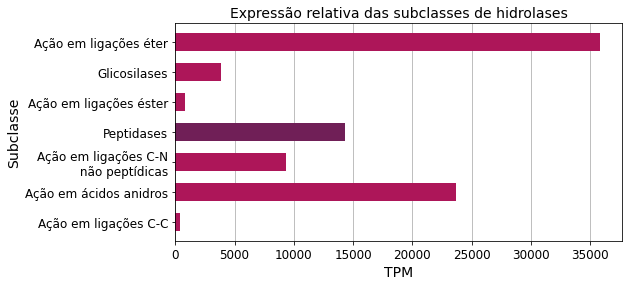

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel("TPM", fontdict={"fontsize":14})
ax.set_ylabel("Subclasse", fontdict={"fontsize":14})
plt.title("Expressão relativa das subclasses de hidrolases", fontdict={"fontsize":14})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)#, rotation=45)
plt.grid(axis="x")
ax.set_axisbelow(True)
#ax.bar_label(classe_hydro_df["tpm"], fmt='%.2f')


hidro_plot = ax.barh(classe_hydro_df["Classe"], classe_hydro_df["tpm"], color= ["#AD1659","#AD1659","#AD1659","#701F57","#AD1659","#AD1659","#AD1659"],  height=0.6)

plt.savefig("/content/drive/MyDrive/expressao_hidrolases_RMA.png", bbox_inches='tight')

In [ ]:
pep_unique = peptidases2["EC number"].unique()

In [ ]:
pep_unique.sort()
pep_unique

array(['3.4.-.-', '3.4.11.-', '3.4.11.-; 3.3.2.10', '3.4.11.18',
       '3.4.11.1; 3.4.11.5', '3.4.11.1; 3.4.13.23; 3.4.11.5', '3.4.11.2',
       '3.4.11.21', '3.4.11.5', '3.4.11.9', '3.4.13.-',
       '3.4.13.19; 3.5.2.6', '3.4.14.-', '3.4.14.10', '3.4.14.4',
       '3.4.14.5', '3.4.16.5', '3.4.16.6', '3.4.17.21', '3.4.19.-',
       '3.4.19.12', '3.4.19.13; 2.3.2.2', '3.4.21.-', '3.4.21.105',
       '3.4.21.53', '3.4.21.63', '3.4.21.83', '3.4.21.89', '3.4.21.92',
       '3.4.22.-', '3.4.22.40', '3.4.22.49', '3.4.23.-',
       '3.4.23.-; 2.7.7.49', '3.4.23.-; 2.7.7.49; 2.7.7.7; 3.1.26.4',
       '3.4.23.-; 2.7.7.49; 2.7.7.7; 3.1.26.4; 2.7.7.-; 3.1.-.-',
       '3.4.23.1', '3.4.23.2', '3.4.23.21', '3.4.23.23', '3.4.23.25',
       '3.4.23.3', '3.4.23.34', '3.4.24.-', '3.4.24.11', '3.4.24.15',
       '3.4.24.56', '3.4.24.59', '3.4.24.64', '3.4.24.70', '3.4.24.71',
       '3.4.24.84', '3.4.24.85', '3.4.25.-', '3.4.25.1'], dtype=object)

In [ ]:
len(peptidases2["EC number"].unique())

55

In [ ]:
Aminopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.11.*") == True])
Dipeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.13.*") == True])
Dipeptidyl_peptidases_tripeptidyl_peptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.14.*") == True])
Serine_carboxypeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.16.*") == True])
Metallocarboxypeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.17.*") == True])
Omega_peptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.19.*") == True])
Serine_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.21.*") == True])
Cysteine_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.22.*") == True])
Aspartic_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.23.*") == True])
Metalloendopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.24.*") == True])
Threonine_endopeptidases = pd.DataFrame(peptidases2[peptidases2["EC number"].str.match("^3.4.25.*") == True])

In [ ]:
peptidases_dict = {"Classe" : ["Treonino endopeptidases", "Metaloendopeptidases", "Aspártico endopeptidases", "Cisteíno endopeptidases", "Serino endopeptidases", "Ômega peptidases", "Metalocarboxipeptidases", "Serino carboxipeptidases", "Dipeptidil peptidases \ne tripeptidil peptidases", "Dipeptidases", "Aminopeptidases"], "tpm" : [Threonine_endopeptidases["soma_tpm"].sum(), Metalloendopeptidases["soma_tpm"].sum(), Aspartic_endopeptidases["soma_tpm"].sum(), Cysteine_endopeptidases["soma_tpm"].sum(), Serine_endopeptidases["soma_tpm"].sum(), Omega_peptidases["soma_tpm"].sum(), Metallocarboxypeptidases["soma_tpm"].sum(), Serine_carboxypeptidases["soma_tpm"].sum(), Dipeptidyl_peptidases_tripeptidyl_peptidases["soma_tpm"].sum(), Dipeptidases["soma_tpm"].sum(), Aminopeptidases["soma_tpm"].sum()]}
peptidases_df = pd.DataFrame(data=peptidases_dict)
peptidases_df

,Classe,tpm
0,Treonino endopeptidases,345.808210
1,Metaloendopeptidases,1211.399324
2,Aspártico endopeptidases,3407.247447
3,Cisteíno endopeptidases,839.620552
4,Serino endopeptidases,1942.702701
5,Ômega peptidases,2199.309985
6,Metalocarboxipeptidases,303.111058
7,Serino carboxipeptidases,523.887658
8,Dipeptidil peptidases \ne tripeptidil peptidases,851.553685
9,Dipeptidases,503.406101


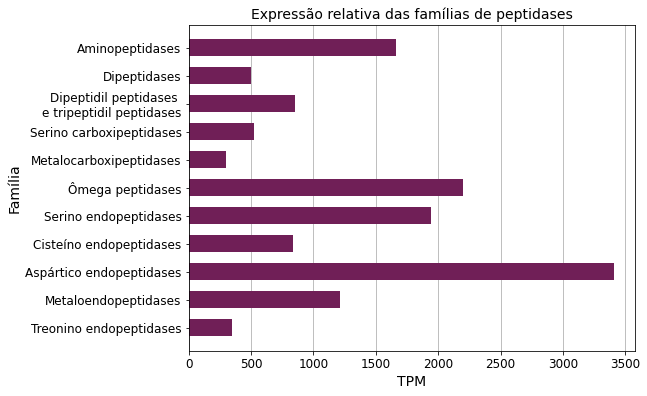

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("TPM", fontdict={"fontsize":14})
ax.set_ylabel("Família", fontdict={"fontsize":14})
plt.title("Expressão relativa das famílias de peptidases", fontdict={"fontsize":14})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)#, rotation=45)
plt.grid(axis="x")
ax.set_axisbelow(True)

plt.barh(peptidases_df["Classe"], peptidases_df["tpm"], color= "#701F57",  height=0.6)

plt.savefig("/content/drive/MyDrive/expressao_peptidases_RMA.png", bbox_inches='tight')